In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
data = pd.read_csv('/content/drug200.csv')

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
data.shape

(200, 6)

<Axes: xlabel='Age', ylabel='Count'>

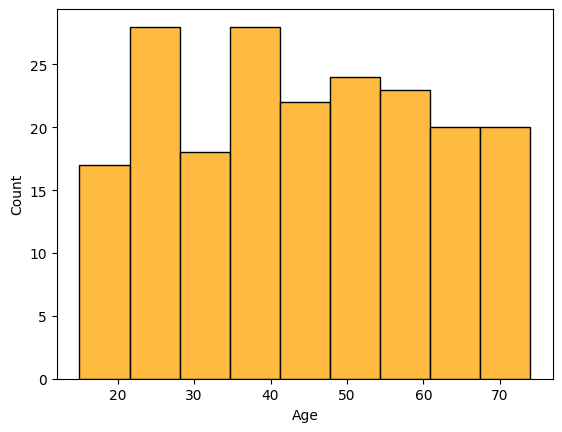

In [ ]:
sns.histplot(x='Age',data=data, color = 'Orange')

<Axes: xlabel='Sex', ylabel='count'>

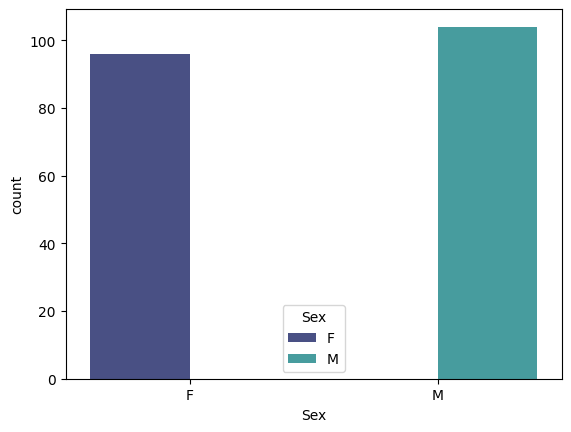

In [ ]:
sns.countplot(x='Sex',data=data,palette='mako',hue='Sex')

<Axes: xlabel='BP', ylabel='count'>

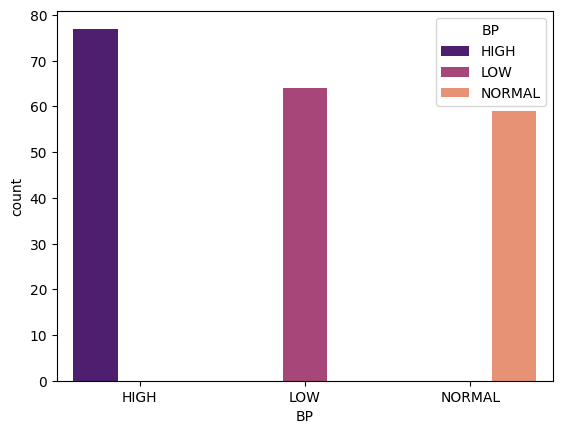

In [ ]:
sns.countplot(x='BP',data=data,hue='BP', palette = 'magma')

<Axes: xlabel='Cholesterol', ylabel='count'>

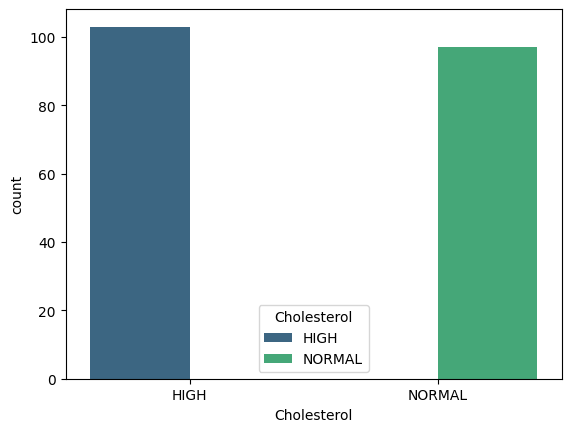

In [ ]:
sns.countplot(x='Cholesterol',data=data,palette='viridis',hue='Cholesterol')

<Axes: xlabel='Na_to_K', ylabel='Count'>

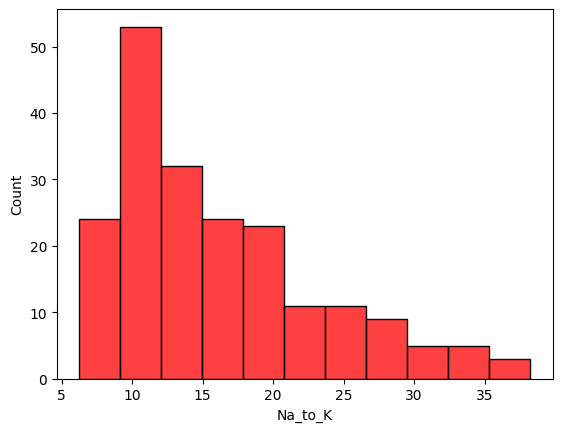

In [ ]:
sns.histplot(x='Na_to_K',data=data, color = 'Red')

<Axes: xlabel='Drug', ylabel='count'>

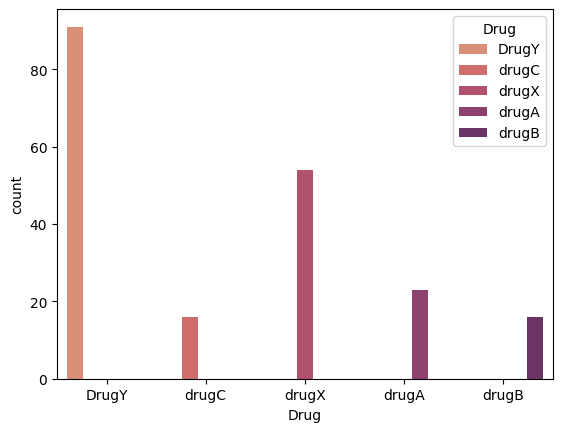

In [ ]:
sns.countplot(x='Drug',data=data,hue='Drug', palette = 'flare')

In [ ]:
y = data['Drug']
data = data.drop('Drug', axis = 1)
x = data

In [ ]:
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [ ]:
n_classes = len(np.unique(y))
print(n_classes)

5


In [ ]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])
x['BP'] = le.fit_transform(x['BP'])
x['Cholesterol'] = le.fit_transform(x['Cholesterol'])
y = le.fit_transform(y)

In [ ]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [ ]:
y

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.3,random_state=2)

In [ ]:
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
28,39,0,1,1,22.697
133,24,1,2,0,25.786
94,56,1,1,0,15.015
42,50,1,2,1,15.790
169,20,0,0,0,11.262


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
from keras import Sequential
from keras.layers import Flatten,Dense

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=5, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
output = Dense(n_classes,activation='softmax')
model.add(output)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 5)                 85        
                                                                 
Total params: 43,813
Trainable params: 43,813
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])
model.fit(x_train,y_train,epochs=25,batch_size=6)

Epoch 1/25
24/24 [==============================] - 2s 4ms/step - loss: 1.3063 - accuracy: 0.6286 - auc: 0.8042
Epoch 2/25
24/24 [==============================] - 0s 4ms/step - loss: 0.7563 - accuracy: 0.6929 - auc: 0.9340
Epoch 3/25
24/24 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.8571 - auc: 0.9810
Epoch 4/25
24/24 [==============================] - 0s 3ms/step - loss: 0.2866 - accuracy: 0.9357 - auc: 0.9943
Epoch 5/25
24/24 [==============================] - 0s 3ms/step - loss: 0.2110 - accuracy: 0.9429 - auc: 0.9959
Epoch 6/25
24/24 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9571 - auc: 0.9982
Epoch 7/25
24/24 [==============================] - 0s 8ms/step - loss: 0.0968 - accuracy: 0.9929 - auc: 0.9999
Epoch 8/25
24/24 [==============================] - 0s 5ms/step - loss: 0.0603 - accuracy: 0.9929 - auc: 1.0000
Epoch 9/25
24/24 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9929 - auc:

In [ ]:
y_pred = model.predict(x_test)
y_pred_labels = y_pred.argmax(axis=1)

2/2 [==============================] - 0s 9ms/step


In [ ]:
y_test.shape

(60, 5)

In [ ]:
y_pred.shape

(60, 5)

In [ ]:
y_pred_labels.shape

(60,)

In [ ]:
threshold = 0.5  
y_pred_labels = (y_pred > threshold).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, y_pred_labels)
for i in range(len(cm)):
    print(f"Confusion Matrix for Label {i + 1}:")
    print(cm[i])
    print()

Confusion Matrix for Label 1:
[[27  0]
 [ 5 28]]

Confusion Matrix for Label 2:
[[52  0]
 [ 3  5]]

Confusion Matrix for Label 3:
[[53  3]
 [ 0  4]]

Confusion Matrix for Label 4:
[[56  1]
 [ 0  3]]

Confusion Matrix for Label 5:
[[44  4]
 [ 0 12]]



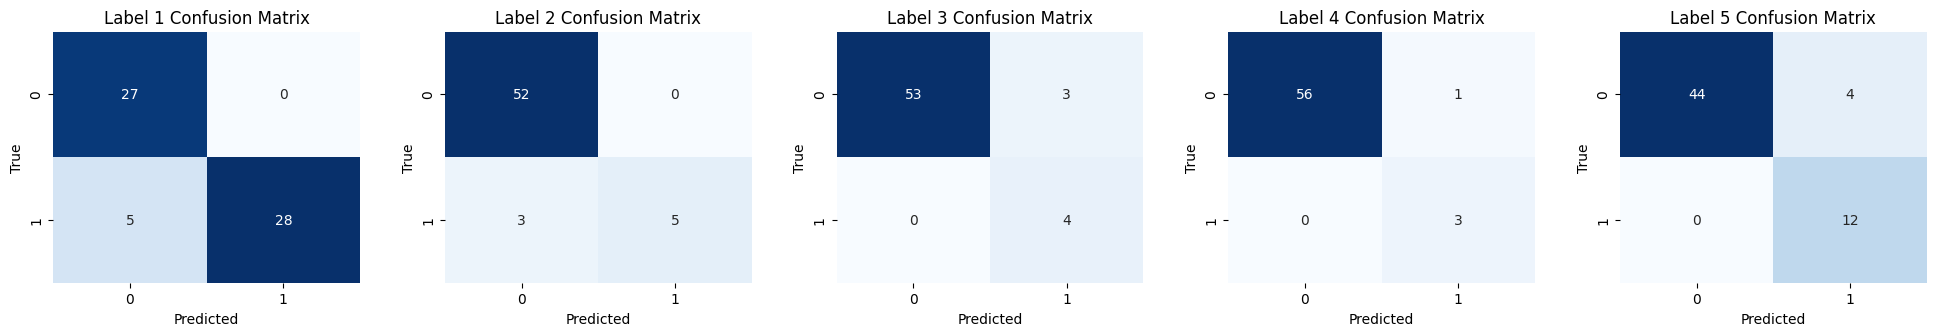

In [ ]:
import matplotlib.pyplot as plt

# Assuming cm is a list of confusion matrices for each label
# Iterate over each confusion matrix and create a heatmap

num_labels = len(cm)
fig, axes = plt.subplots(1, num_labels, figsize=(4 * num_labels, 4))
for i, matrix in enumerate(cm):
    ax = axes[i]
    ax.set_title(f"Label {i+1} Confusion Matrix")
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt="d", cbar=False, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        33
           1       1.00      0.62      0.77         8
           2       0.57      1.00      0.73         4
           3       0.75      1.00      0.86         3
           4       0.75      1.00      0.86        12

   micro avg       0.87      0.87      0.87        60
   macro avg       0.81      0.89      0.83        60
weighted avg       0.91      0.87      0.87        60
 samples avg       0.87      0.87      0.87        60

